In [9]:
import numpy as np
import torch
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import os

### Visualization using the .h5 file

In [2]:
# Load the preprocessed data and view the shapes
PATH = '../data/preprocessed/'
def load_data_and_groundtruth():
    with h5py.File(os.path.join(PATH,'all_uw_data.h5'), 'r') as f:
        data = f['dataset'][:]
        groundtruth = f['groundtruth'][:]
    return data, groundtruth

data, groundtruth = load_data_and_groundtruth()
data.shape, groundtruth.shape

((6, 6, 33660), (6, 5, 1122))

In [4]:
label_0_0 = groundtruth[0, 0, :]
np.min(np.where(label_0_0 == 0))

1090

In [14]:
min_length = groundtruth.shape[2]
for i in [0,1,3,4]:
    for j in range(6):
        label_0_0 = groundtruth[j, i, :]
        loc = np.where(label_0_0 == 0)
        try:
            min_temp = np.min(loc)
        except ValueError:
            pass
        if min_temp < min_length:
            min_length = min_temp
min_length

834

In [25]:
time_len = groundtruth.shape[2]

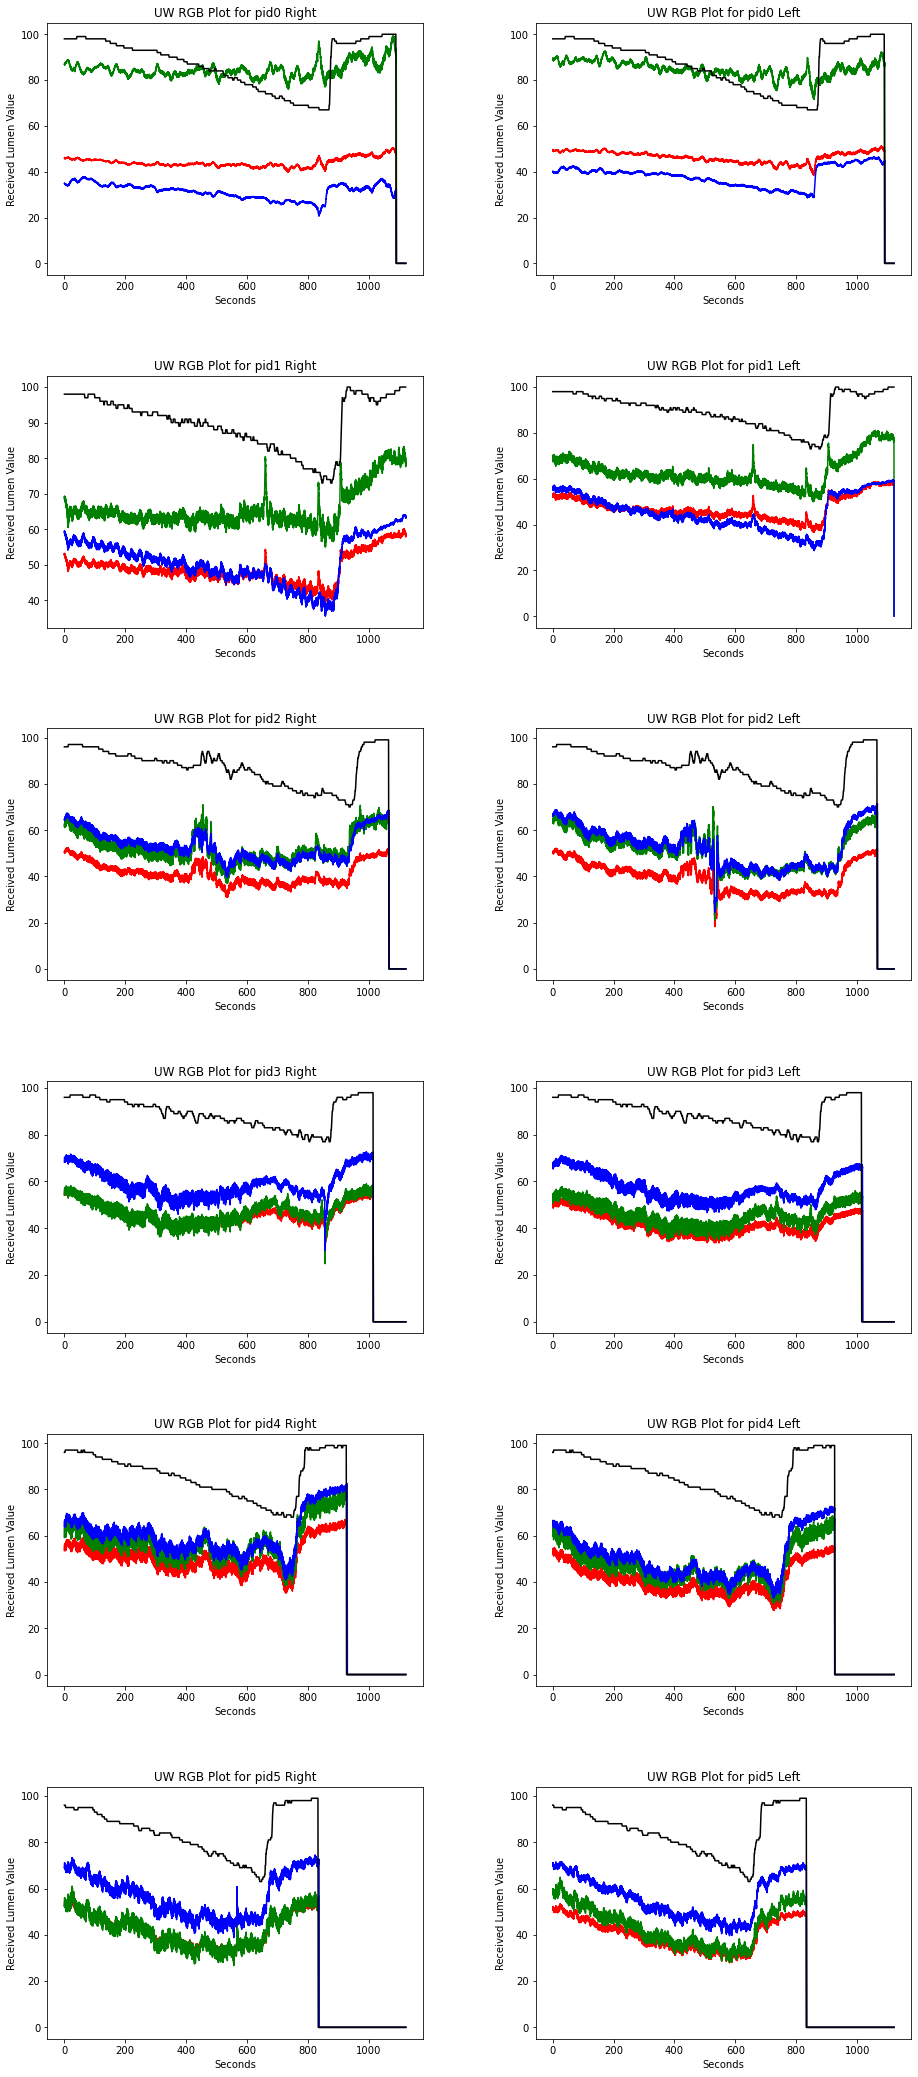

In [31]:
# Plot the red, green, and blue chanel in the time range. Choose either left or right hand.
def plot_RGB(data, gt, ax, pid=0, left=True, sec_from=0, sec_to=1000):
    title = "pid" + str(pid)
    X = np.arange(sec_from, sec_to, 1/30)
    X_gt = np.arange(sec_from, sec_to)
    if left:
        ax.plot(X, data[pid, 0, sec_from*30:sec_to*30], label="red", color="red")
        ax.plot(X, data[pid, 1, sec_from*30:sec_to*30], label="green", color="green")
        ax.plot(X, data[pid, 2, sec_from*30:sec_to*30], label="blue", color="blue")
        title += " Left"
    else:
        ax.plot(X, data[pid, 3, sec_from*30:sec_to*30], label="red", color="red")
        ax.plot(X, data[pid, 4, sec_from*30:sec_to*30], label="green", color="green")
        ax.plot(X, data[pid, 5, sec_from*30:sec_to*30], label="blue", color="blue")
        title += " Right"
    ax.plot(X_gt, gt[pid, 4, sec_from:sec_to], label="ground truth", color="black")
    ax.set_title("UW RGB Plot for " + title)
    # ax.legend()
    ax.set_xlabel("Seconds")
    ax.set_ylabel("Received Lumen Value")
    # ax.show()

fig, ax = plt.subplots(6, 2, figsize=(15,35))
for pid in range(6):
    for hand in range(2):
        plot_RGB(data, groundtruth, ax[pid, hand], pid=pid, left=hand, sec_from=0, sec_to=time_len)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

### Visualization using the .csv file

In [58]:
# import the dataloading function
from preprocess_data_spo2 import *

In [34]:
csv_data = load_data()
csv_gt = load_groundtruth()

In [38]:
data_len = min(csv_data.shape[2] / 30, csv_gt.shape[2])
csv_data = csv_data[:, :, 0:data_len*30]
csv_gt = csv_gt[:, :, 0:data_len]

In [39]:
print(csv_data.shape)
print(csv_gt.shape)

torch.Size([6, 6, 33660])
torch.Size([6, 5, 1122])


In [7]:
# literally load videos
def process_vid_for_averages(vid):
    num = 2
    image = vid.get_data(num)
    plt.imshow(image)
#     plt.show()
    vid_rgb = 0
#     print(vid.shape)
    vid_arr = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0]])
#     print(vid_arr)
    vid_arr_add = [0.0,0.0,0.0]
    for i, im in enumerate(vid):
        vid_arr_add = [np.mean(im[:,:,0]),np.mean(im[:,:,1]),np.mean(im[:,:,2])]
        vid_arr = np.append(vid_arr, [vid_arr_add],axis=0)

    return vid_arr[2:]

In [5]:
from pathlib import Path
import imageio

The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


100001-1487003054311-0-1487003073393
(32722, 3)
100002-1487006909985-0-1487006910227


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(33626, 3)
100003-1487010210734-0-1487010211003


The frame size for reading (144, 176) is different from the source frame size (176, 144).


(31996, 3)
100004-1487016701771-0-1487016702172


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(30524, 3)
100005-1487019989533-0-1487019989854


The frame size for reading (144, 176) is different from the source frame size (176, 144).


(27777, 3)
100006-1487023968612-0-1487023968853


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(24996, 3)


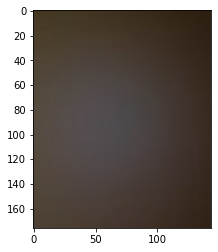

In [10]:
vidpath_left = '..\\data\\raw-videos\\raw\\Left'
vidnames_left = ['100001-1487003054311-0-1487003073393',
                '100002-1487006909985-0-1487006910227',
                '100003-1487010210734-0-1487010211003',
                '100004-1487016701771-0-1487016702172',
                '100005-1487019989533-0-1487019989854',
                '100006-1487023968612-0-1487023968853']

vidpath_right = '..\\data\\raw-videos\\raw\\Right'
vidnames_right = ['100001-1487003016146-0-1487003016393',
                '100002-1487006911581-0-1487006911849',
                '100003-1487010212332-0-1487010212594',
                '100004-1487016703619-0-1487016703979',
                '100005-1487019992000-0-1487019992346',
                '100006-1487023971109-0-1487023971496']


vidpath=vidpath_left
vidnames=vidnames_left

def process_all_vids(vidpath, vidnames):
    vids_dict = {}
    i = 1
    for vidname in vidnames:
        print(vidname)
        fname = Path.joinpath(Path(vidpath),vidname+'.mp4')
        vid = imageio.get_reader(fname)#,'ffmpeg')
        vid_rgb = process_vid_for_averages(vid)
        print(vid_rgb.shape)
        vids_dict[i] = vid_rgb
        i += 1
    return vids_dict

vids_dict = process_all_vids(vidpath, vidnames)
plt.show()

In [15]:
vids_dict[1].shape

(32722, 3)

The frame size for reading (144, 176) is different from the source frame size (176, 144).


100001-1487003016146-0-1487003016393


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(32708, 3)
100002-1487006911581-0-1487006911849


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(33725, 3)
100003-1487010212332-0-1487010212594


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(32004, 3)
100004-1487016703619-0-1487016703979


The frame size for reading (144, 176) is different from the source frame size (176, 144).


(30433, 3)
100005-1487019992000-0-1487019992346


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(27870, 3)
100006-1487023971109-0-1487023971496


The frame size for reading (144, 176) is different from the source frame size (176, 144).
The frame size for reading (144, 176) is different from the source frame size (176, 144).


(25094, 3)


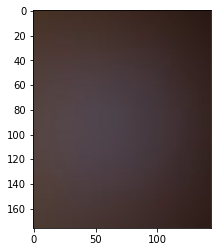

In [16]:
vids_dict_right = process_all_vids(vidpath_right, vidnames_right)

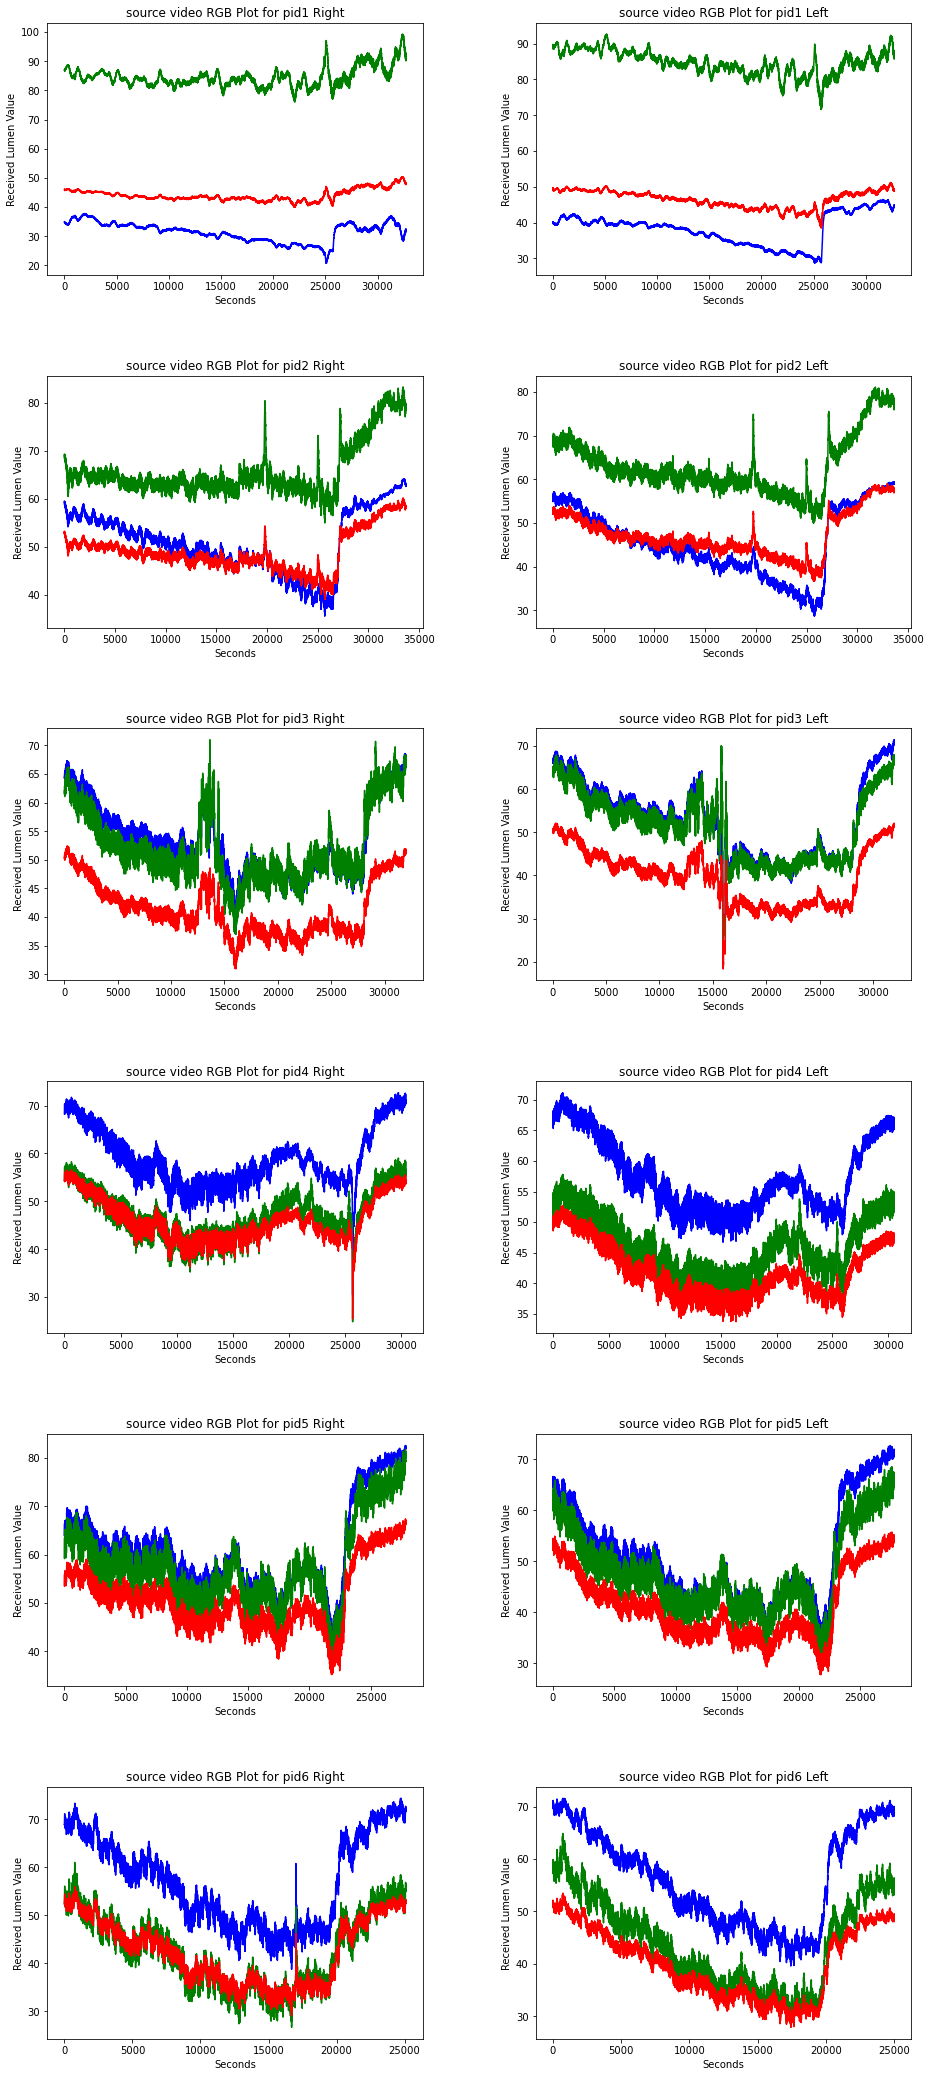

In [21]:
fig, ax = plt.subplots(6, 2, figsize=(15,35))
for pid in range(6):
    for hand in range(2):
        title = "pid" + str(pid+1)
        # plot_RGB(data, groundtruth, ax[pid, hand], pid=pid, left=hand, sec_from=0, sec_to=time_len)
        if hand == 1:
            ax[pid, hand].plot(np.arange(vids_dict[pid+1].shape[0]), vids_dict[pid+1][:,0], color="blue")
            ax[pid, hand].plot(np.arange(vids_dict[pid+1].shape[0]), vids_dict[pid+1][:,1], color="green")
            ax[pid, hand].plot(np.arange(vids_dict[pid+1].shape[0]), vids_dict[pid+1][:,2], color="red")
            title += " Left"
        else:
            ax[pid, hand].plot(np.arange(vids_dict_right[pid+1].shape[0]), vids_dict_right[pid+1][:,0], color="blue")
            ax[pid, hand].plot(np.arange(vids_dict_right[pid+1].shape[0]), vids_dict_right[pid+1][:,1], color="green")
            ax[pid, hand].plot(np.arange(vids_dict_right[pid+1].shape[0]), vids_dict_right[pid+1][:,2], color="red")
            title += " Right"
        ax[pid, hand].set_title("source video RGB Plot for " + title)
        # ax.legend()
        ax[pid, hand].set_xlabel("Seconds")
        ax[pid, hand].set_ylabel("Received Lumen Value")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

In [60]:
data_gt = load_groundtruth()

In [61]:
data_gt.shape

torch.Size([6, 5, 1122])

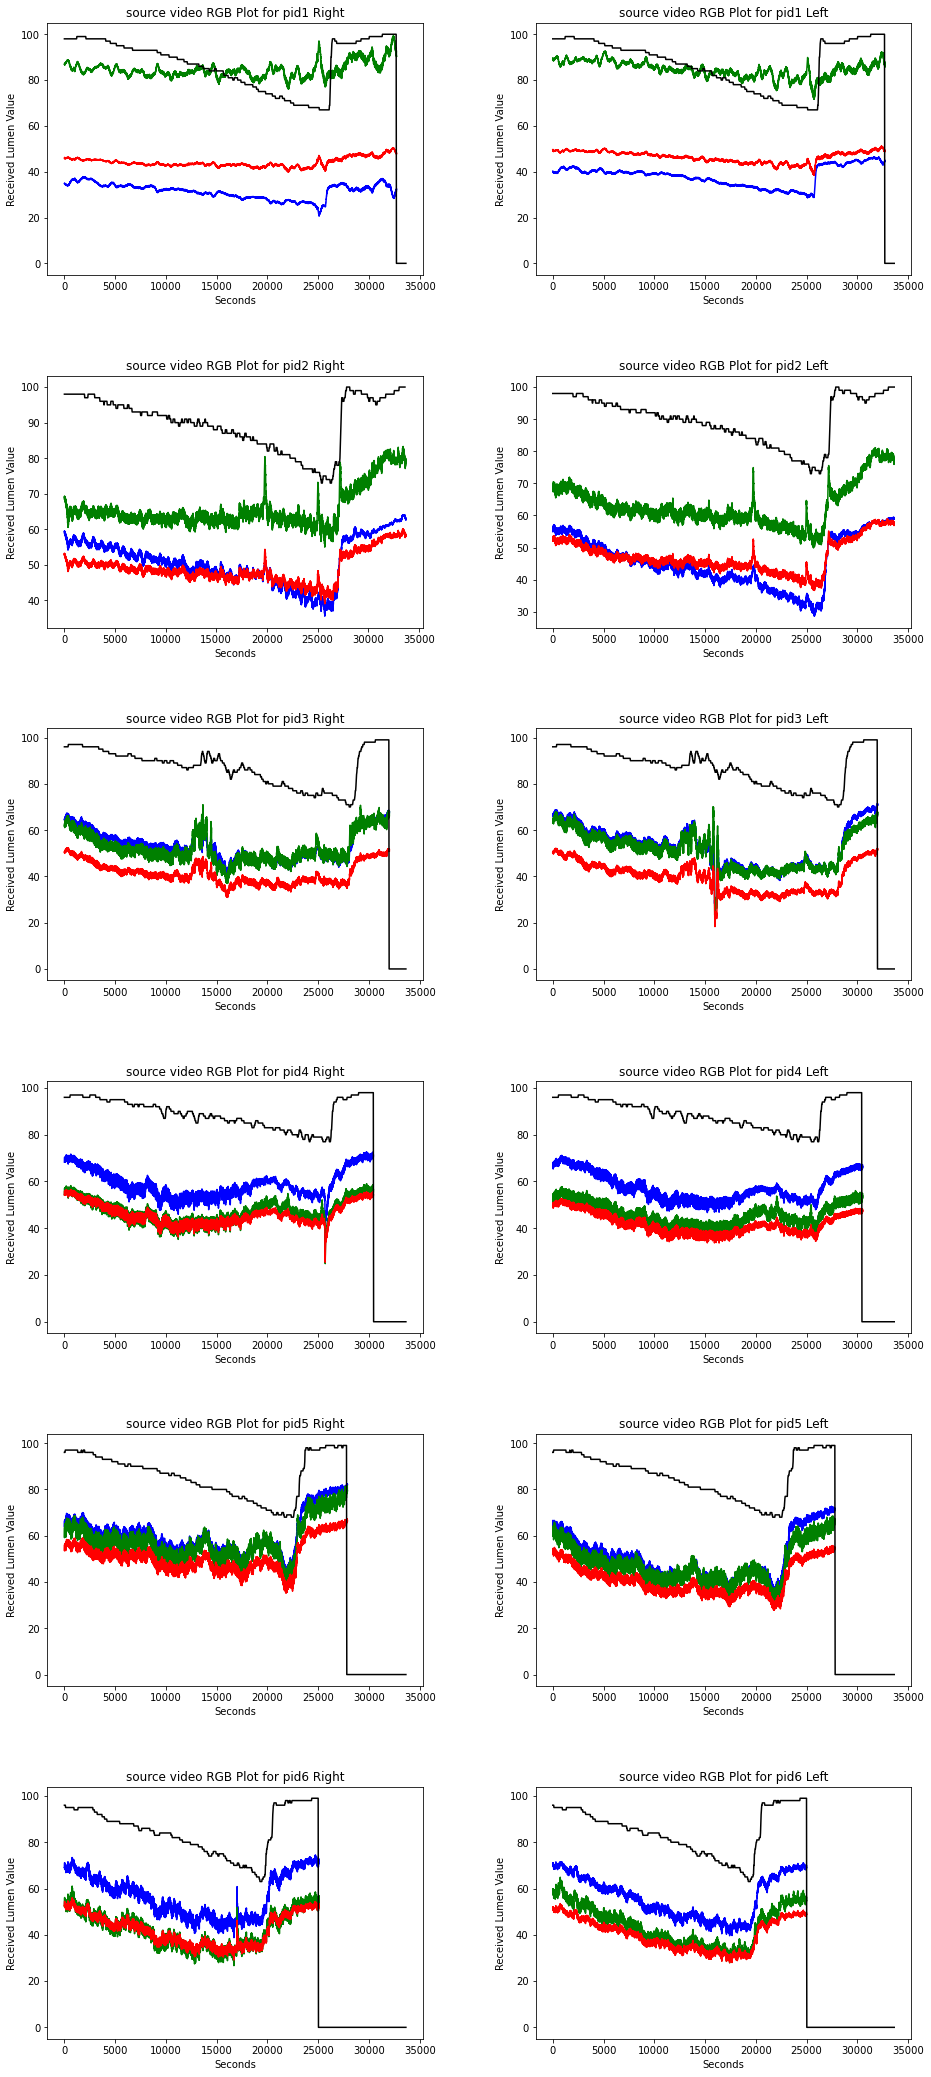

In [62]:
fig, ax = plt.subplots(6, 2, figsize=(15,35))
for pid in range(6):
    for hand in range(2):
        title = "pid" + str(pid+1)
        # plot_RGB(data, groundtruth, ax[pid, hand], pid=pid, left=hand, sec_from=0, sec_to=time_len)
        if hand == 1:
            ax[pid, hand].plot(np.arange(vids_dict[pid+1].shape[0]), vids_dict[pid+1][:,0], color="blue")
            ax[pid, hand].plot(np.arange(vids_dict[pid+1].shape[0]), vids_dict[pid+1][:,1], color="green")
            ax[pid, hand].plot(np.arange(vids_dict[pid+1].shape[0]), vids_dict[pid+1][:,2], color="red")
            title += " Left"
        else:
            ax[pid, hand].plot(np.arange(vids_dict_right[pid+1].shape[0]), vids_dict_right[pid+1][:,0], color="blue")
            ax[pid, hand].plot(np.arange(vids_dict_right[pid+1].shape[0]), vids_dict_right[pid+1][:,1], color="green")
            ax[pid, hand].plot(np.arange(vids_dict_right[pid+1].shape[0]), vids_dict_right[pid+1][:,2], color="red")
            title += " Right"
        ax[pid, hand].plot(np.arange(data_gt.shape[2])*30, data_gt[pid, 4, :], color="black")
        ax[pid, hand].set_title("source video RGB Plot for " + title)
        # ax.legend()
        ax[pid, hand].set_xlabel("Seconds")
        ax[pid, hand].set_ylabel("Received Lumen Value")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)